<a href="https://colab.research.google.com/github/HosseinSadeghi-dev/machine-learning/blob/main/KNN-iris/KNN-iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [9]:
class MyKNearestNeighbors:
    def __init__(self, k):
        self.k = k
        self.x_train = None
        self.y_train = None
        self.number_class = None

    # train
    def fit(self, x_train, y_train):
        self.x_train = x_train
        self.y_train = y_train
        self.number_class = len(np.unique(y_train))

    def nearest_neighbors(self, x_test):
        distance = np.sqrt(np.sum((x_test - self.x_train) ** 2, axis=1))
        near_neighbor = np.argsort(distance)[0:self.k]
        return near_neighbor

    # test
    def predict(self, x_test):
        near_neighbor = self.nearest_neighbors(x_test)
        return np.argmax(np.bincount(self.y_train[near_neighbor]))

    def evaluate(self, x_test, y_test):
        y_pred = []
        for i in range(len(x_test)):
            y = self.predict(x_test[i])
            y_pred.append(y)
        not_correct = abs(sum(y_pred - y_test))
        return (y_pred, y_test), ((((len(y_pred) - not_correct) * 100) / len(y_pred)) / 100)

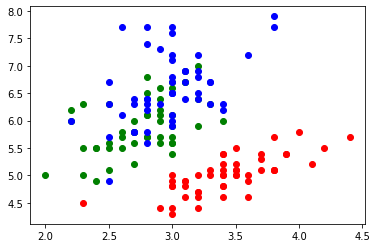

In [14]:
IRIS = load_iris()
X = IRIS.data
Y = IRIS.target
N = (len(X) // len(IRIS.target_names))
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

plt.scatter(X[0:N, 1], X[0:N, 0], c='red')
plt.scatter(X[N:2 * N, 1], X[N:2 * N, 0], c='green')
plt.scatter(X[2 * N:3 * N, 1], X[2 * N:3 * N, 0], c='blue')

0.9666666666666667
0.9666666666666667
0.9666666666666667
1.0
0.9333333333333332
0.9333333333333332
0.9
0.8666666666666667


<BarContainer object of 8 artists>

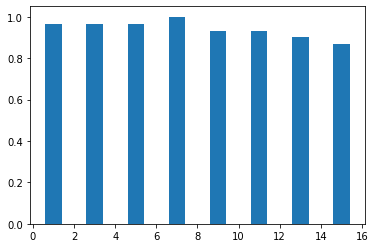

In [15]:
K = [1, 3, 5, 7, 9, 11, 13, 15]
result = []

for i in K:
    knn = MyKNearestNeighbors(i)
    knn.fit(X_train, Y_train)
    result.append([i, knn.evaluate(X_test, Y_test)[1]])

result = np.array(result)

plt.bar(result[:, 0], result[:, 1])

1.0
1.0


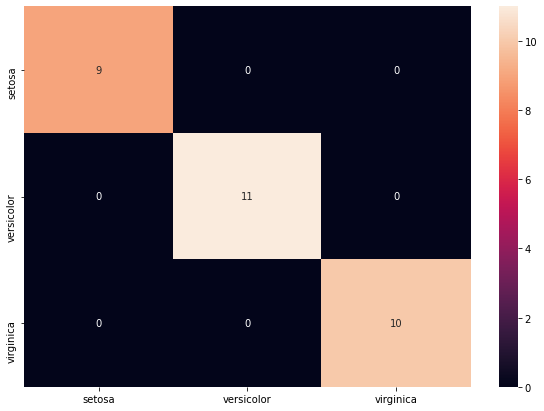

In [11]:
knn5 = MyKNearestNeighbors(5)
knn5.fit(X_train, Y_train)
res_y_pred = knn5.evaluate(X_test, Y_test)[0][0]
res_y_test = knn5.evaluate(X_test, Y_test)[0][1]

set_set = 0
set_ver = 0
set_vir = 0
vir_set = 0
vir_ver = 0
vir_vir = 0
ver_set = 0
ver_ver = 0
ver_vir = 0

for i in range(len(res_y_pred)):
    if res_y_pred[i] == 0 and res_y_test[i] == 0:
        set_set += 1
    elif res_y_pred[i] == 1 and res_y_test[i] == 1:
        ver_ver += 1
    elif res_y_pred[i] == 2 and res_y_test[i] == 2:
        vir_vir += 1
    elif res_y_pred[i] == 0 and res_y_test[i] == 1:
        set_ver += 1
    elif res_y_pred[i] == 0 and res_y_test[i] == 2:
        set_vir += 1
    elif res_y_pred[i] == 2 and res_y_test[i] == 0:
        vir_set += 1
    elif res_y_pred[i] == 2 and res_y_test[i] == 1:
        vir_ver += 1
    elif res_y_pred[i] == 1 and res_y_test[i] == 0:
        ver_set += 1
    else:
        ver_vir += 1

result = np.array([[set_set, set_ver, set_vir],
                   [ver_set, ver_ver, ver_vir],
                   [vir_set, vir_ver, vir_vir]])

df_cm = pd.DataFrame(result, index=[i for i in ['setosa', 'versicolor', 'virginica']],
                     columns=[i for i in ['setosa', 'versicolor', 'virginica']])
plt.figure(figsize=(10, 7))
seaborn.heatmap(df_cm, annot=True)